# **Data preparation**

In [60]:
DATA_SOURCE = "../01_data/adult_reconstruction.csv"
FILE_TO_SAVE = "../01_data/prepared_data.csv"

In [3]:
import pandas as pd
import numpy as np

In [4]:
census_data = pd.read_csv(DATA_SOURCE)

## Overview

In [5]:
census_data.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial


## Dropping (label) outliers

We will drop those records, which are considered to be outliers (i.e. income>99%)

Text(0.5, 1.0, 'Histogram of incomes\n(with outliers)')

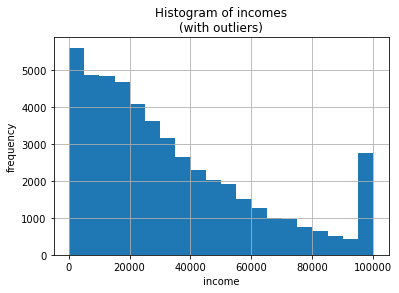

In [22]:
import matplotlib.pyplot as plt
census_data["income"].hist(bins=20)
plt.xlabel("income")
plt.ylabel("frequency")
plt.title("Histogram of incomes\n(with outliers)")

In [26]:
census_data = census_data[census_data["income"] <= census_data["income"].quantile(.99)]

Text(0.5, 1.0, 'Histogram of incomes\n(withot outliers)')

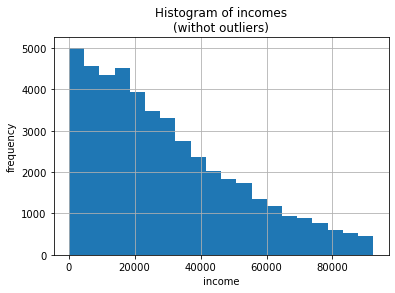

In [27]:
import matplotlib.pyplot as plt
census_data["income"].hist(bins=20)
plt.xlabel("income")
plt.ylabel("frequency")
plt.title("Histogram of incomes\n(withot outliers)")

## Dropping redundant columns and labels

In [28]:
x = census_data.drop(columns=["education", "income"]) #education: redundant, income: label
y = census_data["income"]

## Categorical encoding

We will encode categorical data as one-hot-encoded vectors

In [29]:
import tensorflow as tf

In [30]:
categorical = ["workclass", "marital-status", "relationship", "race", "gender", "native-country", "occupation"]

In [43]:
cat_coded = None
for category in categorical:
    #integer category encoding:
    codes = x[category].unique()
    code_dictionary = {}
    values = []
    for i,code in enumerate(codes):
        code_dictionary[code] = i
    for _,r in x.iterrows():
        values.append(code_dictionary[r[category]])
        
    #one-hot-conding:
    encoder = tf.keras.layers.CategoryEncoding(num_tokens=len(code_dictionary),
                                             output_mode="one_hot")
    cat_coded = encoder(values) if cat_coded is None else np.hstack([cat_coded, encoder(values)])

## Scaling

### Features

In [32]:
numeric = ["hours-per-week", "age", "capital-gain", "capital-loss", "education-num"]

In [57]:
num_scaled = None
for num in numeric:
    scaler = tf.keras.layers.Normalization(axis=None)
    scaler.adapt(x[num])
    num_scaled = scaler(x[num]).numpy().T if num_scaled is None else np.hstack([num_scaled, scaler(x[num]).numpy().T])

### Labels

In [52]:
scaler = tf.keras.layers.Normalization(axis=None)
scaler.adapt(y)
y = scaler(y).numpy()

## Combining all above

In [59]:
data = np.hstack([cat_coded, num_scaled, y.T])

In [61]:
#save data:
np.savetxt(FILE_TO_SAVE, data)